## Figure 2

Panel A: Simulation Stims

Panel B: Simulation Results

Panel C: Natural Repertoire Results

In [53]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir, FIGURE_DIR
import pandas as pd

In [54]:
bID = 's_b1555_22'

In [7]:
logs = pd.read_pickle(PROCESSED_DIR / bID / 'simulation_log.pickle')

In [29]:
logs

,motif_address,motif_id,motif_n,total_gap,kink_factor,kink_std,intensity_kink,intensity_kink_std,white_noise,stimuli_path,id,SDoTMF,mean_SDoTMF
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif58,11,144000,0.0,0.000000,0.0,1.110223e-16,True,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,0,[41.728120191712705],41.728120
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif58,11,144000,0.0,0.000000,0.0,1.110223e-16,False,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,0,[11.683662088232582],11.683662
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif58,11,144000,0.0,0.000000,1.0,2.076942e-01,True,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,0,[29.67723250376058],29.677233
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif58,11,144000,0.0,0.000000,1.0,2.076942e-01,False,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,0,[9.593532149250569],9.593532
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif58,11,144000,1.0,4532.303459,0.0,1.110223e-16,True,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,0,[85.77457191163366],85.774572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif15,11,144000,0.0,0.000000,1.0,2.076942e-01,False,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,63,[10.293343605344678],10.293344
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif15,11,144000,1.0,4532.303459,0.0,1.110223e-16,True,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,63,[43.1214147448689],43.121415
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif15,11,144000,1.0,4532.303459,0.0,1.110223e-16,False,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,63,[19.910959240598494],19.910959
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,motif15,11,144000,1.0,4532.303459,1.0,2.076942e-01,True,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/TM...,63,[85.74248316977274],85.742483


## Panel A

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read

In [34]:
np.unique(logs.motif_id)

array(['motif0', 'motif1', 'motif10', 'motif11', 'motif12', 'motif13',
       'motif14', 'motif15', 'motif16', 'motif17', 'motif18', 'motif19',
       'motif2', 'motif20', 'motif21', 'motif22', 'motif23', 'motif24',
       'motif25', 'motif26', 'motif27', 'motif28', 'motif29', 'motif3',
       'motif30', 'motif31', 'motif32', 'motif33', 'motif34', 'motif35',
       'motif36', 'motif37', 'motif38', 'motif39', 'motif4', 'motif40',
       'motif41', 'motif42', 'motif43', 'motif44', 'motif45', 'motif46',
       'motif47', 'motif48', 'motif49', 'motif5', 'motif50', 'motif51',
       'motif52', 'motif53', 'motif54', 'motif55', 'motif56', 'motif57',
       'motif58', 'motif59', 'motif6', 'motif60', 'motif61', 'motif62',
       'motif63', 'motif7', 'motif8', 'motif9'], dtype=object)

In [39]:
simulation_wavs = logs[(logs.motif_id == 'motif1') & (logs.white_noise == False)].stimuli_path.values

In [87]:
from starling_rhythm.utils.audio import int16_to_float32

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


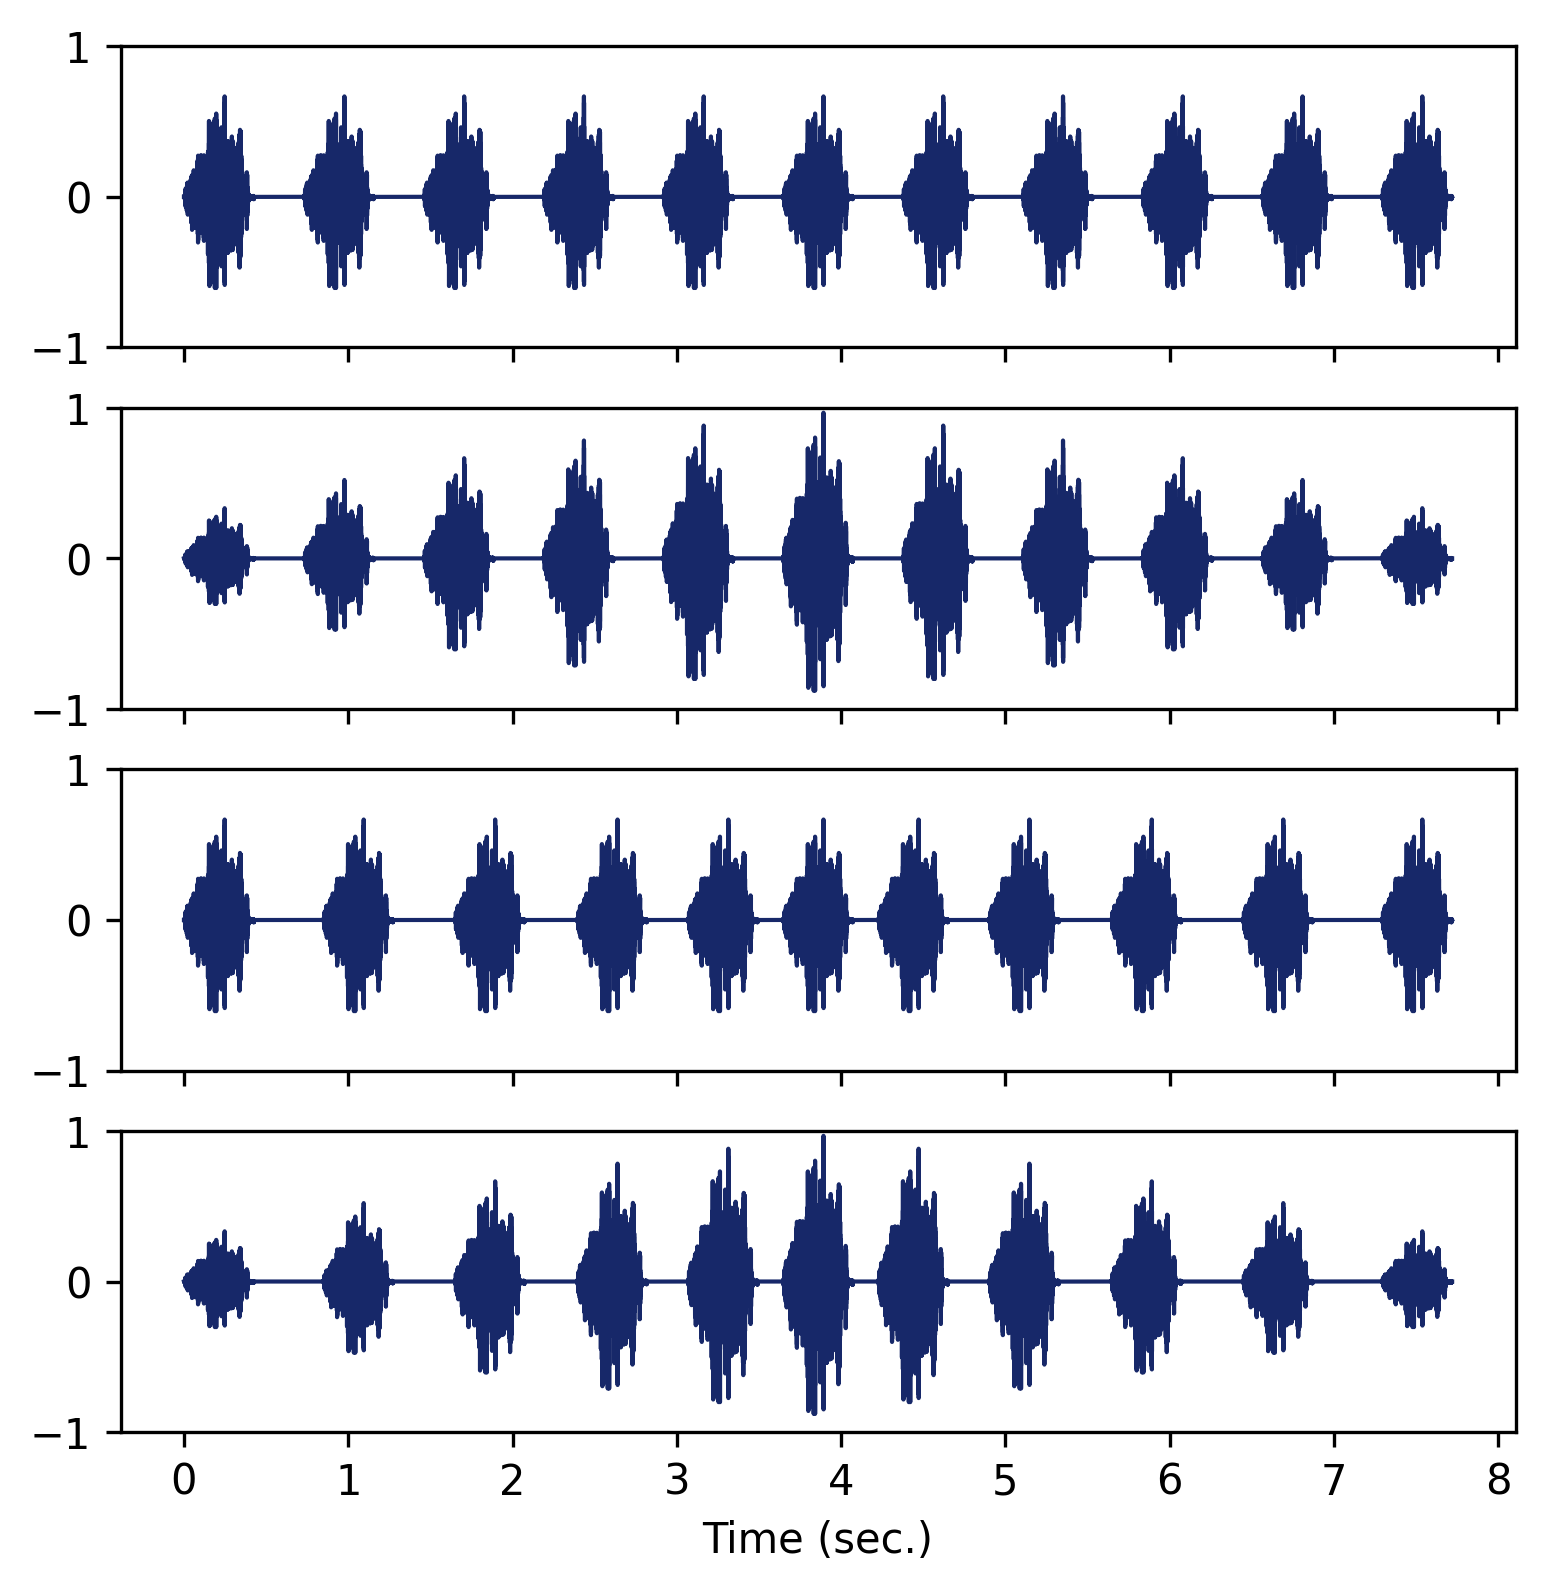

In [95]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 6), dpi = 300, sharex = True)

for i in np.arange(len(simulation_wavs)):
    sr, data = read(simulation_wavs[i])
    data = int16_to_float32(data)
    axes[i].plot(np.linspace(0, len(data)/sr, len(data)), data, color = '#172869', linewidth = 1)
    axes[i].set_ylim(-1, 1)

axes[3].set_xlabel('Time (sec.)')
    
plt.savefig(FIGURE_DIR / 'F2_A_simulation_stims.pdf', dpi = 'figure', format = 'pdf', transparent = True)

## Panel B

In [57]:
import seaborn as sns

In [69]:
logs['intensity_kink'] = logs['intensity_kink'].replace(1.0, 'Yes')
logs['intensity_kink'] = logs['intensity_kink'].replace(0.0, 'No')
logs['kink_factor'] = logs['kink_factor'].replace(1.0, 'Yes')
logs['kink_factor'] = logs['kink_factor'].replace(0.0, 'No')

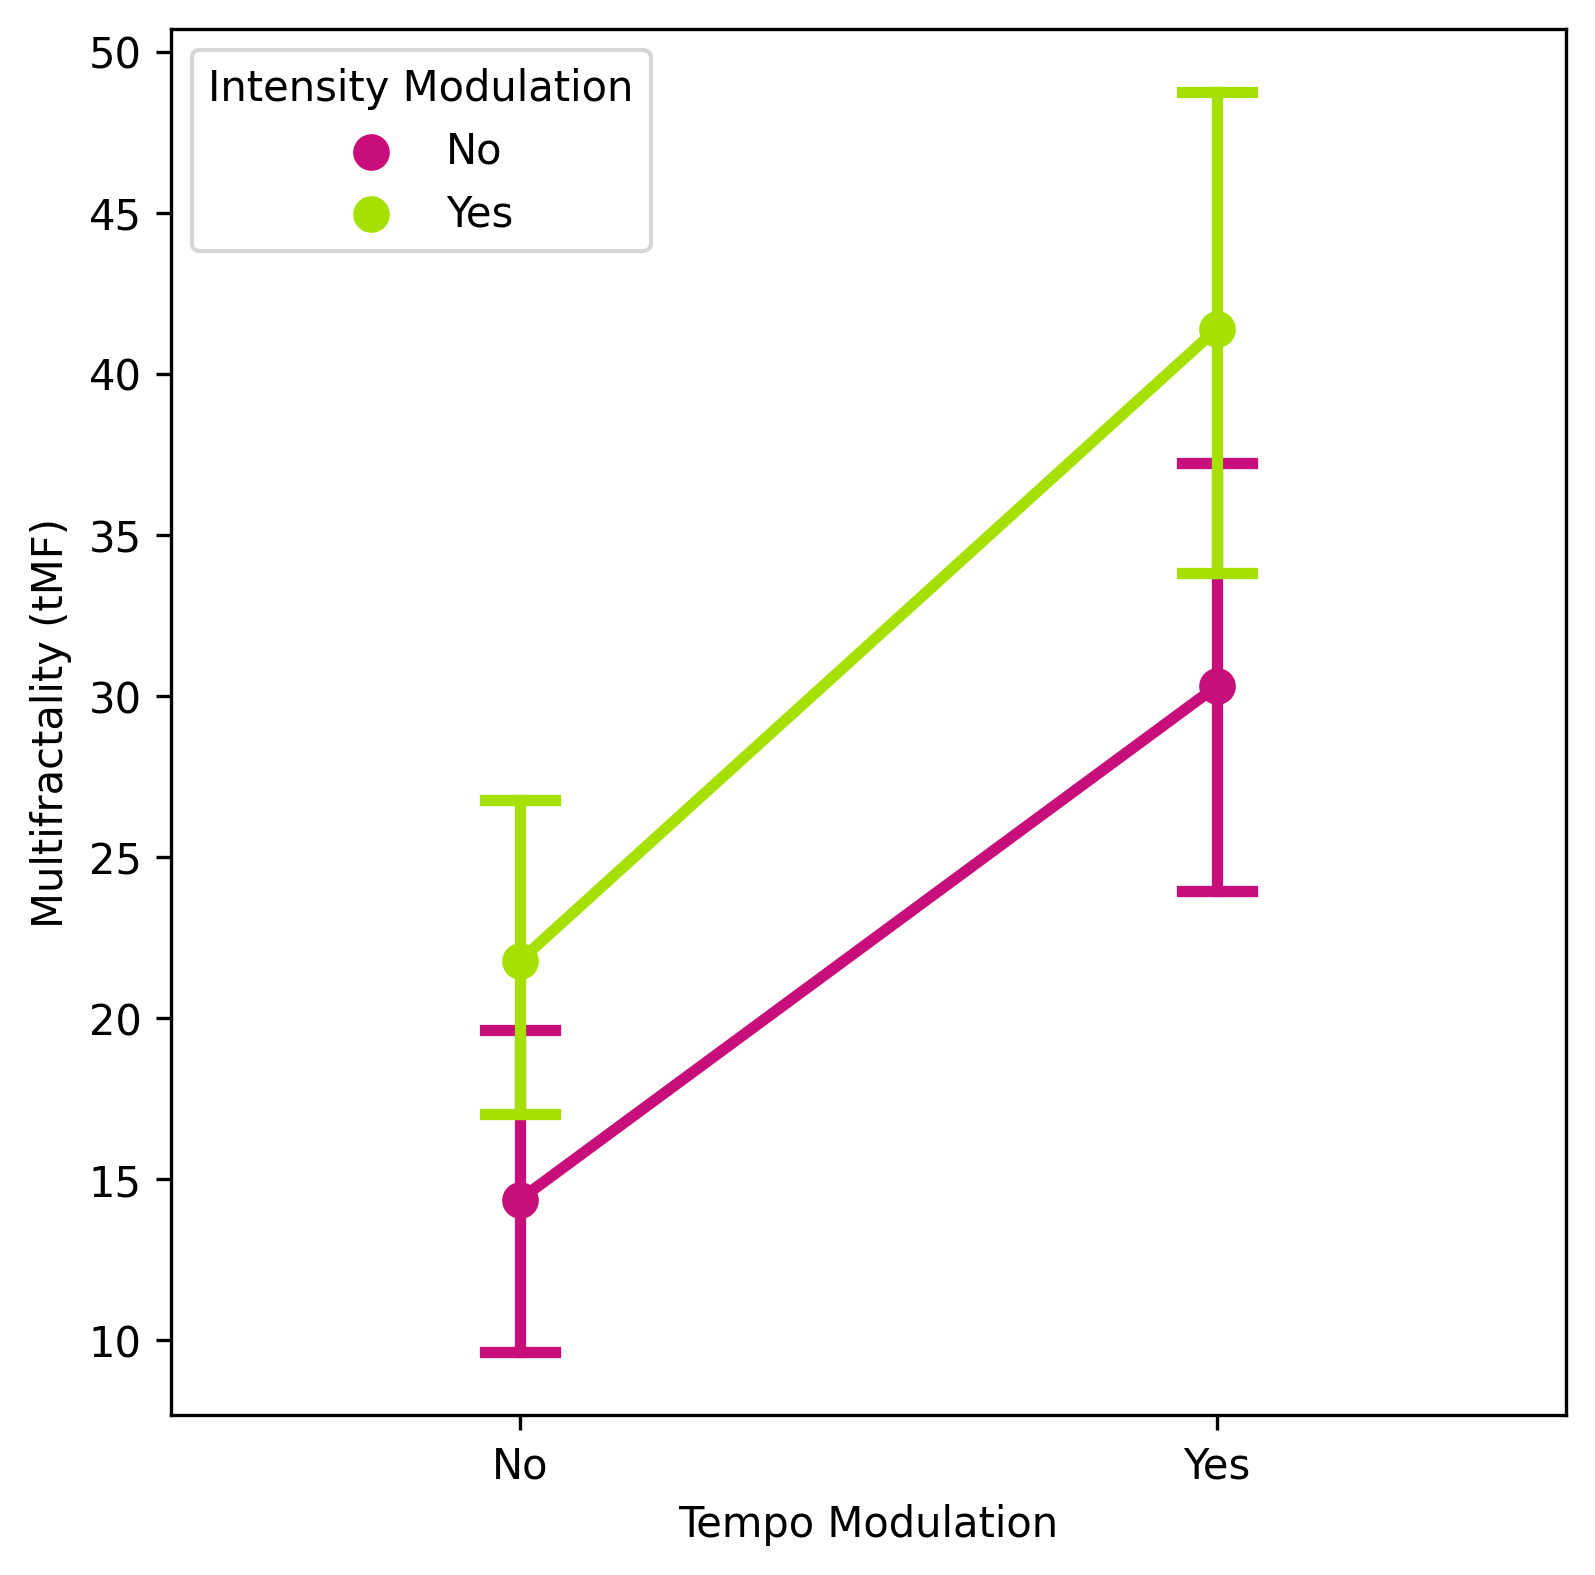

In [79]:
plt.figure(figsize = (6, 6), dpi = 300)

colors = ["#C70E7B", "#A6E000"]
sns.set_palette(sns.color_palette(colors))

sns.pointplot(
    data = logs[logs['white_noise'] == False].reset_index(), 
    x = 'kink_factor', 
    hue = 'intensity_kink', 
    y = 'mean_SDoTMF',
    errorbar = 'ci',
    capsize = .1,
    alpha = 0.8
)

plt.xlabel('Tempo Modulation')
plt.ylabel('Multifractality (tMF)')
plt.legend(title='Intensity Modulation')

## Panel C